<a href="https://colab.research.google.com/github/Agentum07/deep_learning_basics/blob/main/MNIST_with_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=0)

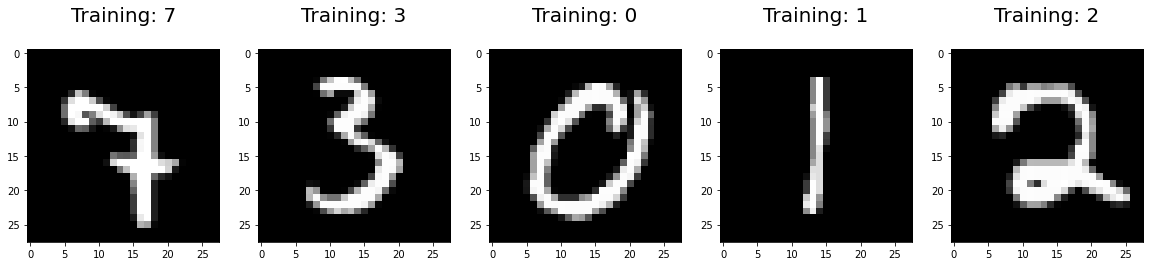

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' %int(label), fontsize = 20)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_img, train_lbl)
predictions = model.predict(test_img)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
score = model.score(test_img, test_lbl)
print(score)

0.9184


In [ ]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(train_img, train_lbl)

In [12]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
accuracy:  0.9210333333333333


In [13]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)
predictions = model.predict(test_img)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
score = model.score(test_img, test_lbl)
print(score)

0.9184


### What was this notebook about?
Using Logistic Regression to run an Image classification algorithm on MNIST

### What did I learn from this notebook?
Use GridSearchCV smartly. I gave it 14 parameters to choose from, and the model took 47 minutes to converge, still did not have a substantial increase in performance.